In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### setting sns styles

In [37]:
sns.set_palette("inferno",n_colors=8)

sns.color_palette()

[(0.104551, 0.047008, 0.25343),
 (0.290763, 0.045644, 0.418637),
 (0.472328, 0.110547, 0.428334),
 (0.64626, 0.173914, 0.378359),
 (0.812239, 0.266786, 0.274661),
 (0.929644, 0.411479, 0.145367),
 (0.985315, 0.608422, 0.024202),
 (0.969783, 0.820825, 0.238686)]

In [40]:
sns.set_style("darkgrid")

### Loading data transformed

In [4]:
test_data = pd.read_excel("test_analysis_etl.xlsx")
test_data.head()

,lead_id,lead_date,lead_name,account_name,intro_call_satus,intro_call_scheduled_date,lead_stage,inbound_channel,outbound_channel
0,481550356938455808,2024-04-01,Lalit,NextGen Digital,no_data,NaT,Closed,Mkt: Inbound: Direct Email,no_data
1,982768502160483584,2024-04-01,Sachi,Anesthesia Professionals Club,no_data,NaT,no_data,Mkt: Inbound: direct / (none),no_data
2,275713475600787008,2024-04-01,youcef,EduMentor,no_data,NaT,no_data,Mkt: Inbound: Google Ads,no_data
3,488785612243604672,2024-04-01,Jim,Lariat Marketing Solutions,no_data,NaT,Closed,no_data,Mass mail
4,245574983586833312,2024-04-01,Eli,Sky Wing Studios,no_data,NaT,Closed,no_data,LinkedIn


In [6]:
### quick look at the statistics

In [5]:
test_data.describe(include='all')

,lead_id,lead_date,lead_name,account_name,intro_call_satus,intro_call_scheduled_date,lead_stage,inbound_channel,outbound_channel
count,1.010000e+03,1010,1010,1010,1010,201,1010,1010,1010
unique,NaN,NaN,684,927,5,NaN,3,19,8
top,NaN,NaN,David,B2B Softwares,no_data,NaN,Closed,no_data,no_data
freq,NaN,NaN,17,15,747,NaN,906,801,209
mean,5.562798e+17,2023-12-18 10:28:45.148514816,NaN,NaN,NaN,2024-07-12 11:49:15.223880704,NaN,NaN,NaN
min,1.008889e+17,2023-09-01 00:00:00,NaN,NaN,NaN,2021-02-03 00:00:00,NaN,NaN,NaN
25%,3.228241e+17,2023-11-01 00:00:00,NaN,NaN,NaN,2023-11-10 00:00:00,NaN,NaN,NaN
50%,5.584735e+17,2024-01-01 00:00:00,NaN,NaN,NaN,2024-01-31 00:00:00,NaN,NaN,NaN
75%,7.879104e+17,2024-02-01 00:00:00,NaN,NaN,NaN,2024-03-13 00:00:00,NaN,NaN,NaN
max,9.997420e+17,2024-04-01 00:00:00,NaN,NaN,NaN,2124-02-29 00:00:00,NaN,NaN,NaN


## Análysis

### convertion rate

Text(0.5, 1.0, 'Lead Stage Distribution')

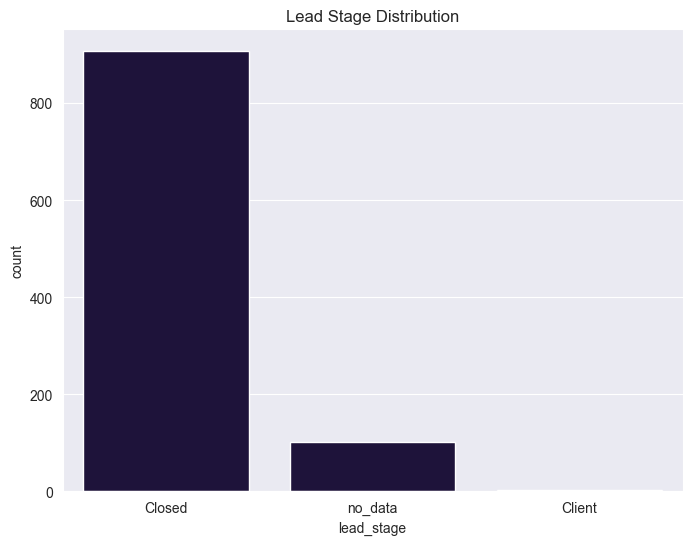

In [41]:
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(test_data["lead_stage"].value_counts())
ax.set_title("Lead Stage Distribution")

In [22]:
### Assumming "Closed" means lead contacted and not converted to Client, Convertion rate is extremely low, i will further explore this in pbi

### Quantity of leads acquired 

Text(0.5, 1.0, 'Lead Acquirement')

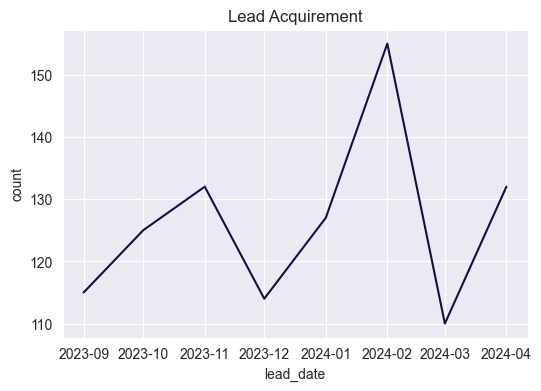

In [42]:
fig,ax=plt.subplots(figsize=(6,4))
sns.lineplot(test_data["lead_date"].value_counts())
ax.set_title("Lead Acquirement")

In [44]:
### i cant define if the lead count result for the period(8 months) is hogh or low,
### becouse i have too few data and i cant define seasonality heere
### I require data from at least 3 previous years to define the lead acquirement status and evolution

In [47]:
test_data["account_name"].value_counts()

account_name
B2B Softwares                    15
no_data                          11
Stealth Mode Company             11
Stealth Mode Corporation #145     9
DataFlow                          3
                                 ..
TagTech                           1
LumiGo                            1
Tech Club                         1
TestGenius                        1
GG Gear                           1
Name: count, Length: 927, dtype: int64